<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:8: SyntaxWarning: invalid escape sequence '\C'
C:\Users\admin\AppData\Local\Temp\ipykernel_8476\1225610112.py:8: SyntaxWarning: invalid escape sequence '\C'
  L2='cp\Cp_6.0.txt' # назва файлу (його адреса);
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


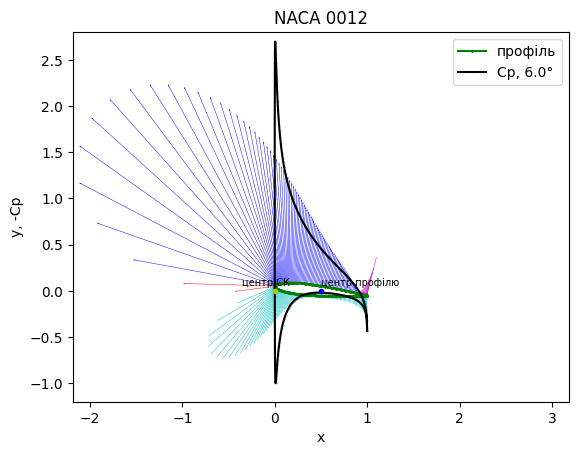

In [1]:
# Зчитування координат (x; y) з файлу NACA 0012.dat і координат (x; Cpi) з файлу Cp_6.0.txt та їх наступна побудова
# розподіл тиску по профілю
import math
import numpy as np
import matplotlib.pyplot as plt

L1='NACA 0012.dat'
L2='cp\Cp_6.0.txt' # назва файлу (його адреса);
f=6.0 #поворот на f°

X1,Y1=[],[]
# відкриваємо файл для зчитування даних
f1 = open(L1, mode='r')
i=0
for row in f1:
    if i>0:
        s=row.split(' ')
        if len(s)==7:
            s=[s[1], s[6]]
        else:
            s=[s[1], s[5]]        
        s1=list(map(float, s))
        X1.append(s1[0])
        Y1.append(s1[1])
    i=i+1
f1.close()    
# поворот на f° та зміщення на 0.5 СК
f=f*np.pi/180 #f у радіанах
X11=np.array(X1)
Y11=np.array(Y1)
X1=(X11-0.5)*np.cos(f)+Y11*np.sin(f)+0.5
Y1=Y11*np.cos(f)-(X11-0.5)*np.sin(f)
# будуємо з зчитаних даних профіль
plt.plot(X1, Y1, '-og',label='профіль', markersize=1)

X2,Y2=[],[]
f2 = open(L2, mode='r')
i=0
for row in f2:
    if i>5 and i<205:
        s=row.split(' ')
        if len(s[5])>1:
            s=[s[1], s[5]]
        elif len(s[4])>1:
            s=[s[1], s[4]]        
        s1=list(map(float, s))
        X2.append(s1[0])
        Y2.append(-s1[1])
    i=i+1
f2.close()

plt.plot(X2, Y2, '-ok',label='Cp, '+str(round(f*180/np.pi,1))+'°', markersize=0.1)
plt.plot(0, 0, '-oy', markersize=3) #центр СК
plt.annotate('центр СК', xy=(-0.35,0.05), fontsize=7)
plt.plot(0.5, 0, '-ob', markersize=3) #центр профілю
plt.annotate('центр профілю', xy=(0.5,0.05), fontsize=7)
# розподіл по профілю
for i in range(1,len(X1)):
    k=1 #масштаб для Cp
    if i<100:
        dx=X1[i]-X1[i-1]
        dy=Y1[i]-Y1[i-1]
        b=(dx*dx+dy*dy)**0.5
        c=-Y2[i-1]*k
        CpX=c*dx/b
        CpY=c*dy/b
        if c<0:
            plt.quiver(X1[i-1], Y1[i-1], -CpY, CpX, color='b', units='xy', scale=1, width=0.005)
        else:
            plt.quiver(X1[i-1]+CpY, Y1[i-1]-CpX, -CpY, CpX, color='m', units='xy', scale=1, width=0.005)
    else:
        dx=X1[i]-X1[i-1]
        dy=Y1[i]-Y1[i-1]
        b=(dx*dx+dy*dy)**0.5
        c=-Y2[i-1]*k
        CpX=c*dx/b
        CpY=c*dy/b
        if c<0:
            plt.quiver(X1[i-1], Y1[i-1], -CpY, CpX, color='r', units='xy', scale=1, width=0.005)
        else:
            plt.quiver(X1[i-1]+CpY, Y1[i-1]-CpX, -CpY, CpX, color='c', units='xy', scale=1, width=0.005)
            
plt.ylabel('y, -Cp')
plt.xlabel('x')
plt.title('NACA 0012')
plt.axis('equal')#однакові масштаби для x та y
plt.legend()
plt.ylim(-1.2, 2.8)
plt.xlim(-0.5, 1.5)
plt.show()

# 'b' blue
# 'g' green
# 'r' red
# 'c' cyan
# 'm' magenta
# 'y' yellow
# 'k' black
# 'w' white


